# Classification d'émotions dans les tweets avec la régression logistique

## Installation des dépendances

In [ ]:
# Nous utilisons scikit-learn pour la modélisation et le prétraitement
# !pip install scikit-learn


## Importation des bibliothèques
Nous allons utiliser plusieurs bibliothèques de **scikit-learn** pour prétraiter les données et entraîner le modèle de régression logistique.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


## Pourquoi la régression logistique ?

La **régression logistique** est un modèle de classification simple et efficace. Elle attribue des probabilités aux différentes classes (dans notre cas, les émotions et sentiments) en se basant sur les features (ou caractéristiques) qui correspondent aux tweet (avec la longueur, les mots, les charactères, ...).

- **Simple à interpréter** : La régression logistique est un modèle linéaire. Elle est donc facile à comprendre : les caractéristiques influencent directement la probabilité d'appartenance à une classe.

- **Efficace pour la classification multi-classes** : La régression logistique peut être étendue à la classification multi-classes (par exemple : joy, anger, sadness) en ajustant ses paramètres internes.

- **Rapide à entraîner** : Par rapport à des modèles plus complexes comme les réseaux de neurones, la régression logistique s'entraîne rapidement et nécessite moins de ressources.

https://mrmint.fr/wp-content/uploads/2017/09/one-vs-all-classification-768x480.png

## Jeu de données (tweets + émotions)

In [ ]:
# tweets = [
#     ("I love the weather today!", "joy"),
#     ("I feel really sad now.", "sadness"),
#     ("I am so angry with the service.", "anger"),
#     ("This is so funny!", "joy"),
#     ("I'm disgusted by the behavior.", "disgust"),
#     ("This makes me so happy!", "joy"),
#     ("I can't stand this anymore!", "anger"),
#     ("I don't like the new update.", "disgust"),
#     ("I am crying because of the bad news.", "sadness"),
# ]

In [ ]:
# Charger le fichier Excel
df = pd.read_csv("tweets_data.csv", encoding="utf8", sep=";")

df['Text'] = df['Text'].astype(str).fillna("")
df['emotion'] = df['emotion'].astype(str).fillna("")

# Sélectionner les colonnes pertinentes pour l'entraînement
x = df['Text']       # Les tweets (features)
y = df['emotion']    # Les émotions (labels)

# Vérification des données
# print(df.head())

In [ ]:
# Préparer les données pour l'entraînement
# df = pd.DataFrame(tweets, columns=['text', 'emotion'])

# Séparer les données en train/test
# x = df['text']  # Les tweets (features)
# y = df['emotion']  # Les émotions (labels)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


## Pourquoi utiliser TF-IDF Vectorizer ?

Le TF-IDF Vectorizer transforme chaque tweet en un vecteur numérique, permettant au modèle de machine learning de comprendre le texte. TF-IDF combine deux éléments :

TF (Term Frequency) : fréquence d'un mot dans le tweet.
IDF (Inverse Document Frequency) : mesure l'importance du mot dans l'ensemble des tweets (les mots très fréquents dans tout le corpus sont moins importants. ex: Le, pour, de, comme, ...).

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)

`max_features=1000` limite le vocabulaire aux 1000 mots les plus fréquents mais il faut tester avec 500, 2000, 5000 en fonction de la taille du jeu de données et comparer les résultats.

In [ ]:
x_train_tfidf = vectorizer.fit_transform(x_train)  # Apprendre le vocabulaire (enregistre dans vectorizer) et transformer les données d'entraînement en vecteurs
x_test_tfidf = vectorizer.transform(x_test)  # Transformer les données de test en vecteurs en utilisant le même vocabulaire (qui est dans vectorizer)

## Entraîner une régression logistique

La régression logistique est un modèle supervisé (entraînement d'un modèle avec un jeu de données comportant les résultats).

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(x_train_tfidf, y_train)  # Entraînement du modèle sur les données transformées

LogisticRegression(max_iter=200)

- `x_train_tfidf` : Vecteurs TF-IDF des tweets d’entraînement.
- `y_train` : Les classes d'émotions associées aux tweets d’entraînement.

Le modèle s'ajuste avec l'entraînement.
Pour chaque donnée, le modèle va estimer l'émotion, vérifier le résultat associé et réajuster ses paramètres internes afin de minimiser l'erreur de prédiction autant que possible.

## Prédiction sur le jeu de test

In [ ]:
y_pred = model.predict(x_test_tfidf) # x : tweets / y : émotions
accuracy = accuracy_score(y_test, y_pred) # proportion de tweets correctement classés
print("Proportion de tweets correctement classés")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Proportion de tweets correctement classés
Accuracy: 0.5924
Classification Report:
              precision    recall  f1-score   support

       anger       0.65      0.84      0.73       724
anticipation       0.50      0.58      0.53       508
     disgust       0.48      0.25      0.33       344
        fear       1.00      0.10      0.18        31
         joy       0.62      0.70      0.65       615
         nan       0.00      0.00      0.00         4
    optimism       0.71      0.24      0.36       142
     sadness       0.53      0.24      0.33       128
    surprise       0.00      0.00      0.00         4

    accuracy                           0.59      2500
   macro avg       0.50      0.33      0.35      2500
weighted avg       0.59      0.59      0.57      2500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


On utilise le modèle entraîné juste avant.

Le jeu de données n'est pas équilibré et ne représente pas correctement l'ensemble des émotions.

### Visualisation du modèle

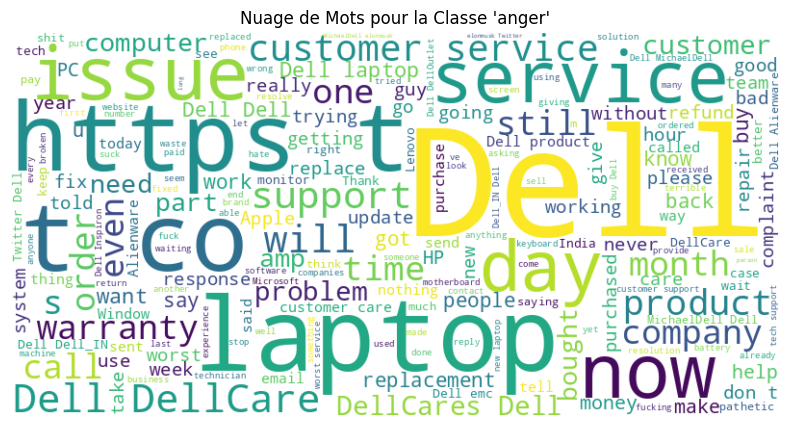

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Exemple pour la classe 'anger'
anger_text = " ".join(df[df['emotion'] == 'anger']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(anger_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de Mots pour la Classe 'anger'")
plt.show()


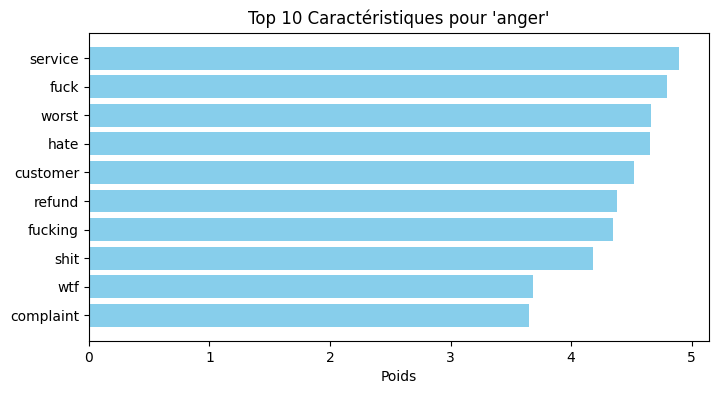

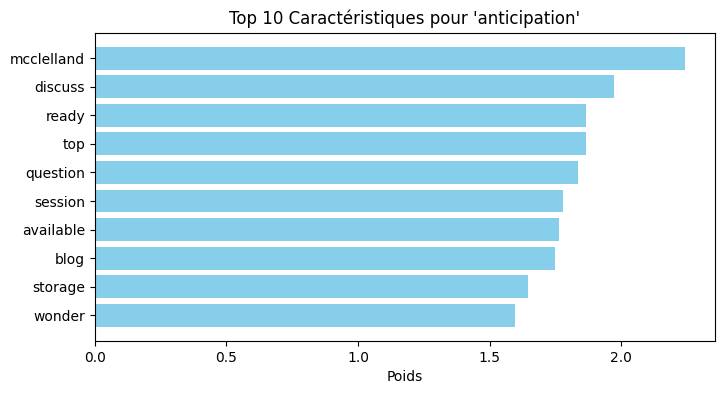

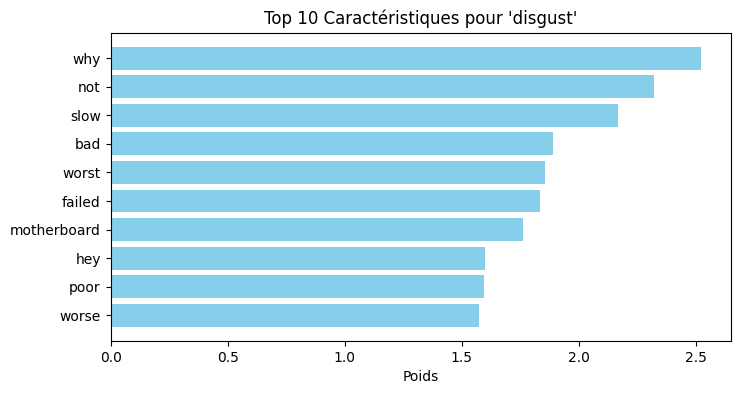

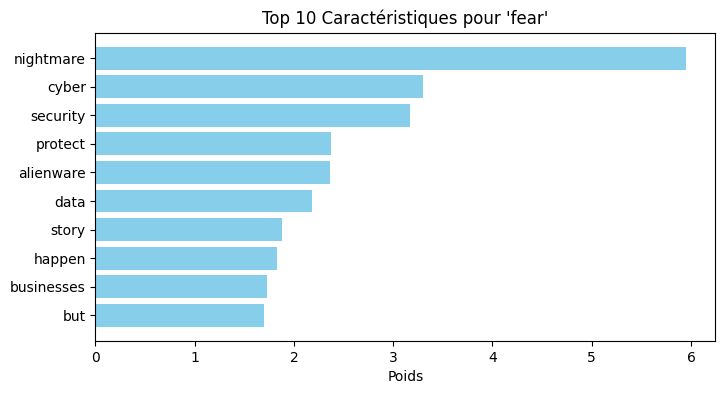

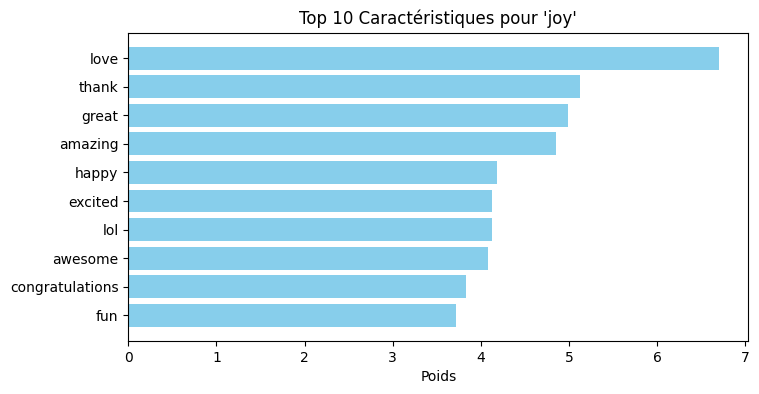

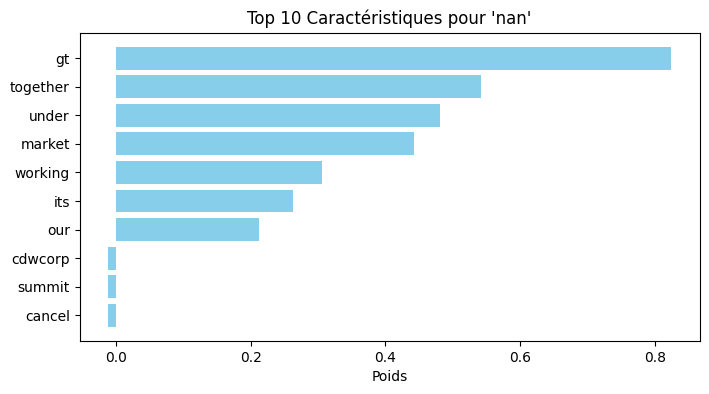

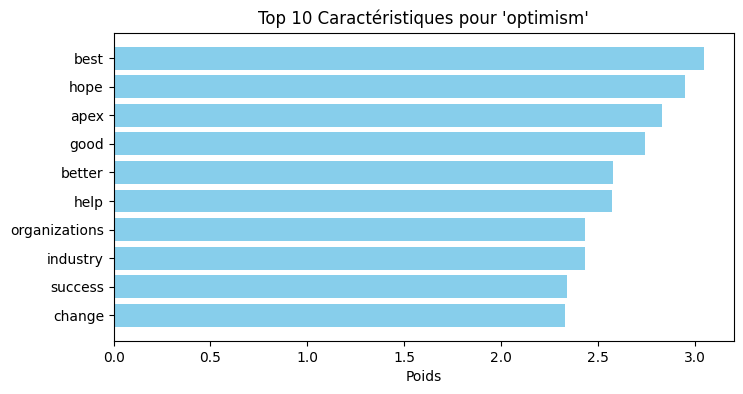

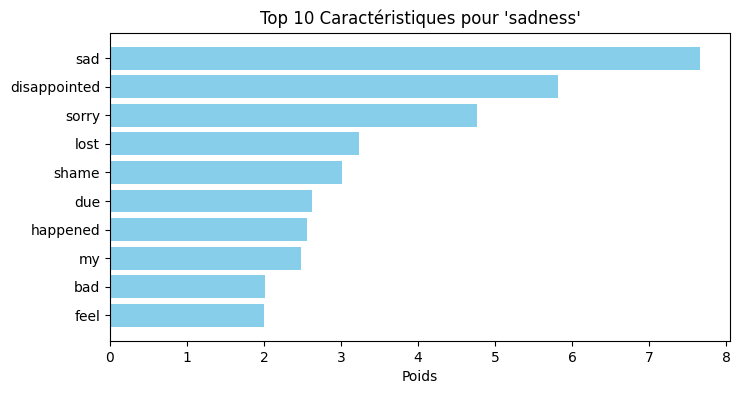

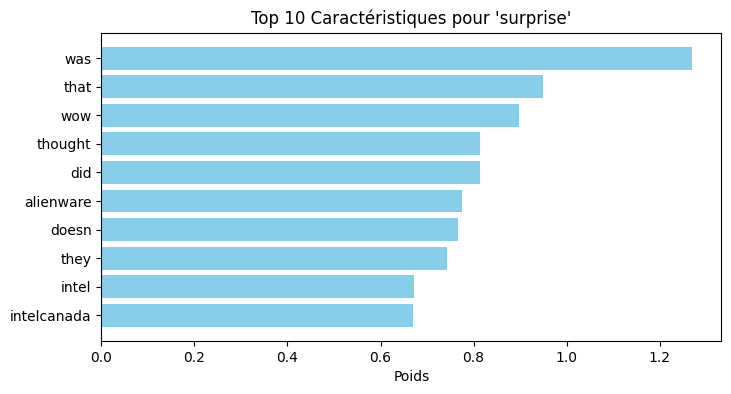

In [ ]:
import numpy as np

# Extraction des coefficients
coefficients = model.coef_  # coefficients pour chaque classe
feature_names = vectorizer.get_feature_names_out()

for i, emotion in enumerate(model.classes_):
    top10_indices = np.argsort(coefficients[i])[-10:]  # top 10 caractéristiques
    top10_features = feature_names[top10_indices]
    top10_weights = coefficients[i][top10_indices]

    plt.figure(figsize=(8, 4))
    plt.barh(top10_features, top10_weights, color="skyblue")
    plt.title(f"Top 10 Caractéristiques pour '{emotion}'")
    plt.xlabel("Poids")
    plt.show()


## Tester sur de nouveaux tweets

In [ ]:
new_tweets = [
    "I'm so happy with my results!",
    "This is the worst day ever.",
    "I can't believe it!",
    ":)",
    "😂",
    "🙂"
]

# Transformation des nouveaux tweets avec le vectorizer déjà entraîné
new_tweets_tfidf = vectorizer.transform(new_tweets)

# Prédiction des émotions
predicted_emotions = model.predict(new_tweets_tfidf)

for tweet, emotion in zip(new_tweets, predicted_emotions):
    print(f"Tweet: '{tweet}' => Predicted Emotion: {emotion}")

Tweet: 'I'm so happy with my results!' => Predicted Emotion: joy
Tweet: 'This is the worst day ever.' => Predicted Emotion: anger
Tweet: 'I can't believe it!' => Predicted Emotion: anticipation
Tweet: ':)' => Predicted Emotion: anticipation
Tweet: '😂' => Predicted Emotion: anticipation
Tweet: '🙂' => Predicted Emotion: anticipation


Pour des textes simples, le modèle fonctionne !